<a href="https://colab.research.google.com/github/Whaleman0423/Deep_Learning_model/blob/main/CNN_Cifar10_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, models, layers, utils, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
img_size = 32

#####Load Dataset
#####https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(x_train, y_train), (x_val, y_val) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


index 31257
class :  frog


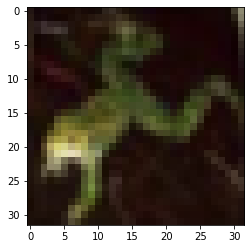

In [4]:
trans = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

idx = np.random.randint(x_train.shape[0])
print("index", idx)
img, label = x_train[idx], y_train[idx]
label = int(label)
print('class : ', trans[label])
plt.imshow(img)

In [5]:
x_train.shape  # 看一下長怎樣

(50000, 32, 32, 3)

In [6]:
# x_train[0].shape, x_train[0],
# np.max(x_train[0]), y_train[0]  ## 看一下長怎樣
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

####Preprocess 預處理

In [7]:
# Normalization: 0~1 or -1~1
x_train_p = x_train / 255.
x_val_p = x_val / 255.
# x_train_p = x_train_p.astype('float32')
# x_val_p = x_val_p.astype('float32')
# # one-hot encoding 
# y_train = utils.to_categorical(y_train, num_classes=num_classes)
# y_val = utils.to_categorical(y_val, num_classes=num_classes)
# print(y_train[0], end='\n')


# 改用 SparseCategoricalCrossentropy 
# 不用 one-hot-encoding
# y_train = np.array(y_train).reshape((50000,)).astype("float32")
# y_val = np.array(y_val).reshape((10000,)).astype("float32")

x_train.shape, x_val_p.shape, y_train.shape, y_val.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [8]:
inputs = layers.Input(shape=(img_size, img_size, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)   # 攤平
x = layers.Dense(512, activation='relu')(x)
prediction = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [10]:
print(y_train[0:1])   # 訓練前
model(x_train_p[0:1])

[[6]]


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09811598, 0.09669401, 0.09731303, 0.10210061, 0.10469291,
        0.09668382, 0.10463715, 0.0976261 , 0.10453603, 0.09760041]],
      dtype=float32)>

In [11]:
model.compile(
        loss = losses.SparseCategoricalCrossentropy(),
        optimizer = optimizers.SGD(),
        metrics = ['acc']
)

In [12]:
logs = model.fit(x_train_p, y_train,
                 batch_size=64,
                 epochs=10,
                 verbose=1,
                 validation_data=(x_val_p, y_val))

Epoch 1/10
782/782 [==============================] - 15s 16ms/step - loss: 2.0781 - acc: 0.2534 - val_loss: 1.8969 - val_acc: 0.3225
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 1.7382 - acc: 0.3817 - val_loss: 1.6339 - val_acc: 0.4144
Epoch 3/10
782/782 [==============================] - 12s 16ms/step - loss: 1.5331 - acc: 0.4575 - val_loss: 1.4829 - val_acc: 0.4609
Epoch 4/10
782/782 [==============================] - 12s 16ms/step - loss: 1.3921 - acc: 0.5069 - val_loss: 1.4353 - val_acc: 0.4820
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 1.2969 - acc: 0.5400 - val_loss: 1.3659 - val_acc: 0.5058
Epoch 6/10
782/782 [==============================] - 12s 16ms/step - loss: 1.2186 - acc: 0.5702 - val_loss: 1.3165 - val_acc: 0.5313
Epoch 7/10
782/782 [==============================] - 12s 16ms/step - loss: 1.1417 - acc: 0.5994 - val_loss: 1.3638 - val_acc: 0.5198
Epoch 8/10
782/782 [==============================] - 12s 16ms

####Logs :

In [15]:
history = logs.history
history

{'acc': [0.25336000323295593,
  0.3817000091075897,
  0.4575200080871582,
  0.5069199800491333,
  0.5400400161743164,
  0.5701799988746643,
  0.5994200110435486,
  0.6243199706077576,
  0.6507800221443176,
  0.6765599846839905],
 'loss': [2.0780584812164307,
  1.7382296323776245,
  1.5331039428710938,
  1.3920979499816895,
  1.296854019165039,
  1.2185862064361572,
  1.141708493232727,
  1.0714709758758545,
  0.9992090463638306,
  0.9315725564956665],
 'val_acc': [0.32249999046325684,
  0.41440001130104065,
  0.4609000086784363,
  0.4819999933242798,
  0.5058000087738037,
  0.5313000082969666,
  0.5198000073432922,
  0.57669997215271,
  0.5911999940872192,
  0.59170001745224],
 'val_loss': [1.8968812227249146,
  1.6338775157928467,
  1.4829498529434204,
  1.4353448152542114,
  1.3659203052520752,
  1.3165398836135864,
  1.3638126850128174,
  1.2194596529006958,
  1.1809780597686768,
  1.1786878108978271]}

Text(0.5, 1.0, 'acc')

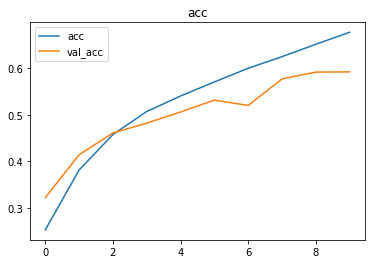

In [17]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')

Text(0.5, 1.0, 'loss')

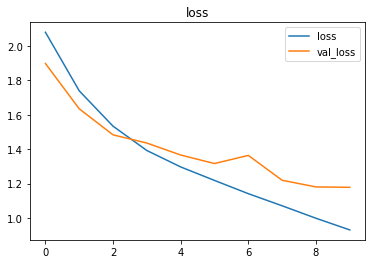

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

###Metrics :

In [30]:
from sklearn.metrics import classification_report, confusion_matrix


prediction = model.predict(x_val_p)
y_pred = np.argmax(prediction, axis=-1)

print(y_true.shape, y_pred.shape)
y_pred

(10000,) (10000,)


array([3, 8, 1, ..., 5, 1, 7])

In [31]:
# classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.74      0.62      1000
           1       0.72      0.68      0.70      1000
           2       0.60      0.39      0.47      1000
           3       0.46      0.42      0.44      1000
           4       0.67      0.36      0.47      1000
           5       0.55      0.44      0.48      1000
           6       0.76      0.57      0.65      1000
           7       0.54      0.80      0.65      1000
           8       0.74      0.71      0.73      1000
           9       0.52      0.80      0.63      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.58     10000
weighted avg       0.61      0.59      0.58     10000



In [34]:
import pandas as pd
mat = confusion_matrix(y_val, y_pred)

pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(10)],
        columns=["{}(預測)".format(trans[i]) for i in range(10)]
)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),739,23,5,6,5,2,6,21,81,112
automobile(正確),31,684,3,10,0,1,2,4,30,235
bird(正確),179,16,390,67,51,62,48,108,26,53
cat(正確),86,19,42,423,33,147,46,123,14,67
deer(正確),104,16,91,61,357,52,54,195,31,39
dog(正確),57,9,47,194,26,436,19,148,18,46
frog(正確),39,27,47,116,33,52,571,46,20,49
horse(正確),34,7,12,26,19,39,1,799,7,56
ship(正確),99,59,5,9,4,3,1,9,714,97
truck(正確),33,96,4,9,1,4,3,22,24,804


#### Save model

In [37]:
model.save('my_model.h5')
model2 = models.load_model("my_model.h5")
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [47]:
# 儲存參數
model.save_weights("weights.h5")